<a href="https://colab.research.google.com/github/mayur7garg/66DaysOfData/blob/main/Day%209/Isolation_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Isolation Forest for Outlier detection

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

## Data Creation

### Set random seed

In [2]:
rng = np.random.RandomState(7)

### Create dummy data
Data is created using two normal distributions. Randomnly selected 5% of the data is sampled from a uniform distribution that will help in creating outlier data points.

In [3]:
X_train = rng.randn(1000, 2)
X_train = np.r_[X_train + 10, X_train]
outlier_indices = rng.randint(low = 0, high = 2000, size = 100)
X_train[outlier_indices] = rng.uniform(low = -5, high = 15, size = (100, 2))
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

### Visualizing the training data

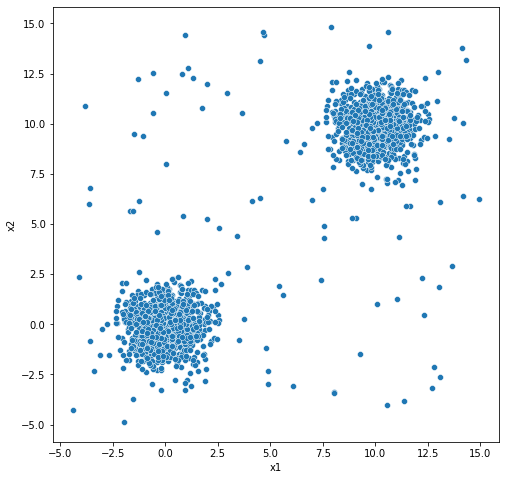

In [4]:
plt.figure(figsize = (8, 8))
sns.scatterplot(data = X_train, x = 'x1', y = 'x2');

## Model training and prediction

### Train an isolation forest with 5% as contamination rate

In [5]:
clf = IsolationForest(max_samples = 100, contamination = 0.05, random_state = rng)
clf.fit(X_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.05,
                max_features=1.0, max_samples=100, n_estimators=100,
                n_jobs=None,
                random_state=RandomState(MT19937) at 0x7FDFFE4D97C0, verbose=0,
                warm_start=False)

### Visualize the predictions

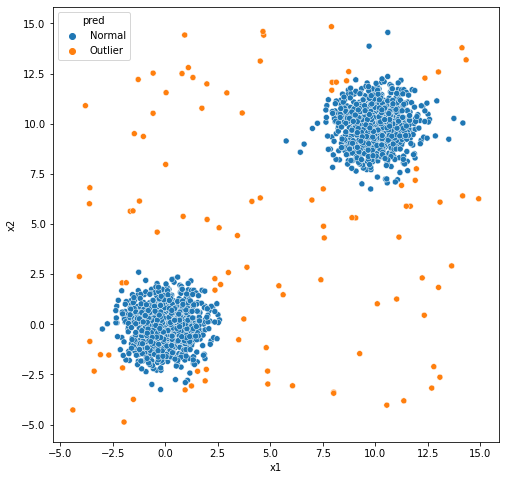

In [6]:
X_train['pred'] = clf.predict(X_train)
X_train['pred'] = X_train['pred'].replace({1: 'Normal', -1: 'Outlier'})

plt.figure(figsize = (8, 8))
sns.scatterplot(data = X_train, x = 'x1', y = 'x2', hue = 'pred');